In [94]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run FirstDataExploration_Helper.ipynb
%run FirstDataExploration_Plot.ipynb

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


# First data Exploration

From the datasets (images) available from [kaggle_dataset](https://www.kaggle.com/prateek0x/eye-disorder-dataset):

* Cataract Disease

In [2]:
kaggle_path = "prateek0x/eye-disorder-dataset"
kaggle_path_Name = "eye-disorder-dataset"
kaggle_zip_file = True
kaggle_dataset_download(kaggle_path, kaggle_path_Name, kaggle_zip_file)

In [3]:
dfEyeDataset = pd.read_csv(r'eye-disorder-dataset/eye_dataset.csv')

In [4]:
dfEyeDataset.shape

(100, 50133)

In [5]:
#Checking out nulls: Location is not clean at all!
dfNulls = get_nulls_data(dfEyeDataset)

In [6]:
dfNulls = dfNulls.sort_values(dfNulls.max().idxmax(), ascending=False)
dfNulls.head(3)

,Total,PercNotNull
50131,0,100.0
50082,0,100.0
50120,0,100.0


In [7]:
dfEyeDataset.dtypes.head(3)

Type    object
0        int64
1        int64
dtype: object

In [8]:
labelSeriel = dfEyeDataset["Type"]
#type(label)
dfLabel = labelSeriel.to_frame()
dfLabel.groupby('Type')['Type'].count()

Type
bulk       22
cat        42
crossed    36
Name: Type, dtype: int64

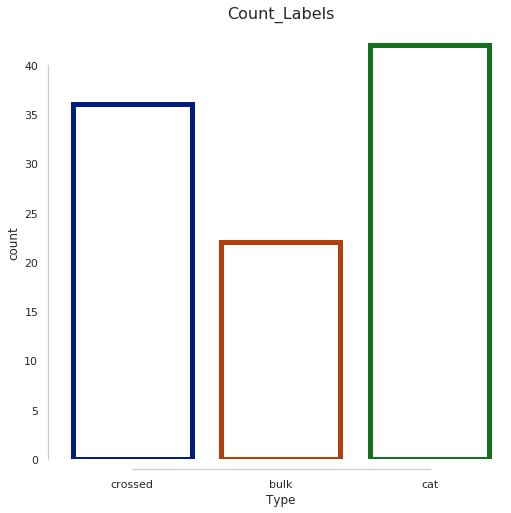

In [9]:
count_countplot(df = dfLabel, x_var = "Type", ax_title = "Count_Labels")

In [10]:
dfPixels = dfEyeDataset.drop(['Type'],axis=1)
dfPixels.head(3)
#X = X.values.reshape(-1,151,332,1)
#X = X/255.0

,0,1,2,3,4,5,6,7,8,9,...,50122,50123,50124,50125,50126,50127,50128,50129,50130,50131
0,44,42,52,47,45,44,37,42,52,87,...,2,3,4,5,7,9,5,4,7,7
1,48,46,43,41,41,44,47,49,65,61,...,91,87,75,78,82,85,84,80,74,71
2,118,120,121,122,125,124,123,131,128,127,...,164,166,162,159,157,158,158,162,158,163


In [11]:
type(dfPixels.values)

numpy.ndarray

In [12]:
arrayPixels = dfPixels.values.reshape(-1,151,332,1)

In [13]:
arrayPixels.shape

(100, 151, 332, 1)

In [14]:
arrayPixels = arrayPixels/255.0
arrayPixels.shape

(100, 151, 332, 1)

In [15]:
#Shape of one image
arrayPixels[0].shape

(151, 332, 1)

In [22]:
label_index = np.where(np.array(labelSeriel) == "cat")
label_index

(array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
        92, 93, 94, 95, 96, 97, 98, 99]),)

In [24]:
label_index[0]

array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
       75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91,
       92, 93, 94, 95, 96, 97, 98, 99])

In [27]:
label_index[0][1]

59

In [41]:
len(label_index[0])

42

In [121]:
%run FirstDataExploration_Helper.ipynb
%run FirstDataExploration_Plot.ipynb

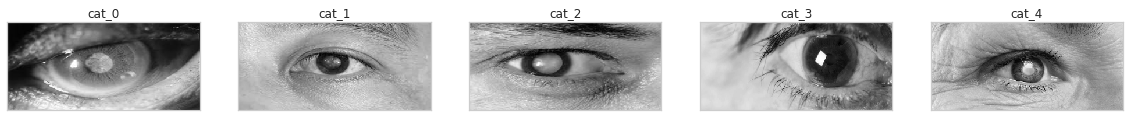

In [122]:
image_display(pixels = arrayPixels, labels = labelSeriel,label = "cat", imgNumber = 5)